In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
import statsmodels
import statsmodels.api as sm
import pydotplus
from IPython.display import Image  # Fix the typo in 'Ipython'
import graphviz

import os




In [46]:
import zipfile
import pandas as pd
import os

# Replace 'path/to/your/zip/file.zip' with the actual path to your ZIP file
zip_file_path = 'C:\\Users\\kr754\\Downloads\\168127724421060ec2379f8793842aa5b168a_.zip'
extract_folder = 'C:\\Users\\kr754\\Downloads\\extracted_data'

# Specify the path within the ZIP archive
zip_internal_path = 'Decision Tree Project/Dataset/HeartDisease.csv'

# Extract the specific file from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(zip_internal_path, extract_folder)

# Read the CSV file into a pandas DataFrame
csv_file_path = os.path.join(extract_folder, zip_internal_path)
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [51]:
pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


In [52]:
df.shape

(303, 14)

In [53]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [54]:
    plt.rcParams['figure.figsize']=[15,8]

# 2.Set Options

In [55]:
pd.options.display.max_columns=None

pd.options.display.max_rows=None

np.set_printoptions(suppress=True)

In [56]:
df.shape

(303, 14)

In [57]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [63]:
import pandas as pd

# Assuming df_Heart_disease is your DataFrame or create one

# Convert specified columns to object data type
for col in ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']:
    df[col] = df[col].astype('object')


In [65]:
import pandas as pd

# Assuming df_Heart_Disease is your DataFrame or create one

# Extract features and target
df_features = df.iloc[:, df.columns != 'target']
df_target = df.iloc[:, df.columns == 'target']


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [67]:
df_features.describe(include='object').transpose()

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


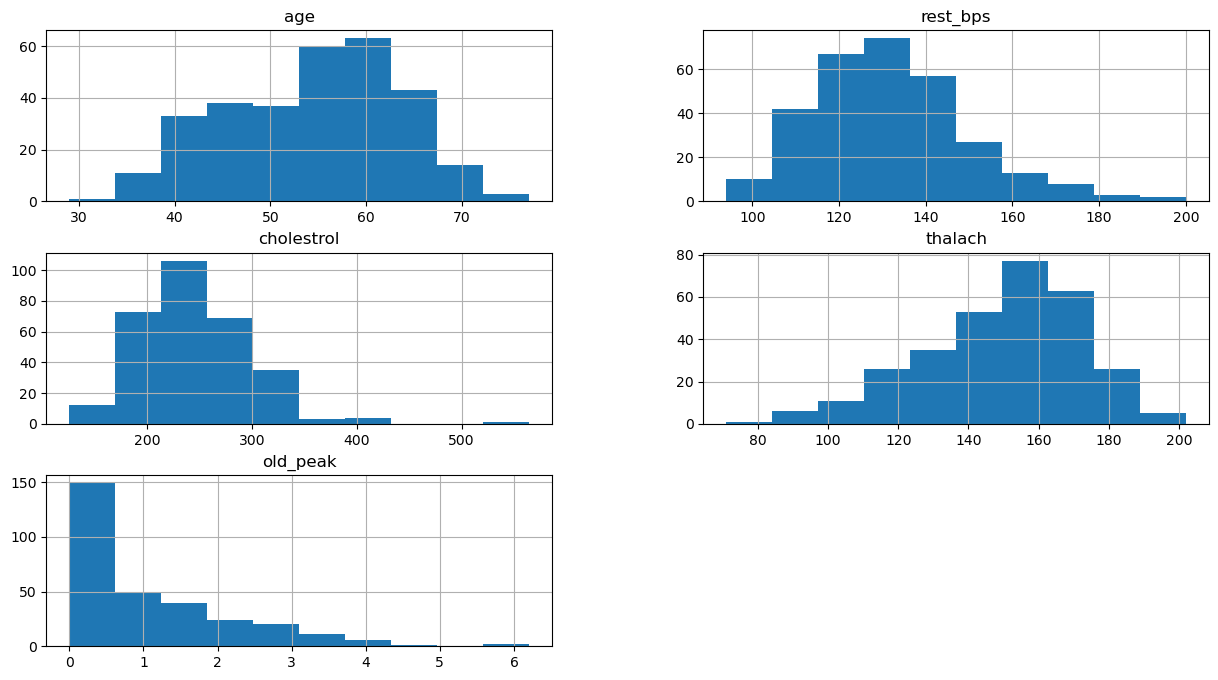

In [68]:
df_features.hist()

plt.show()

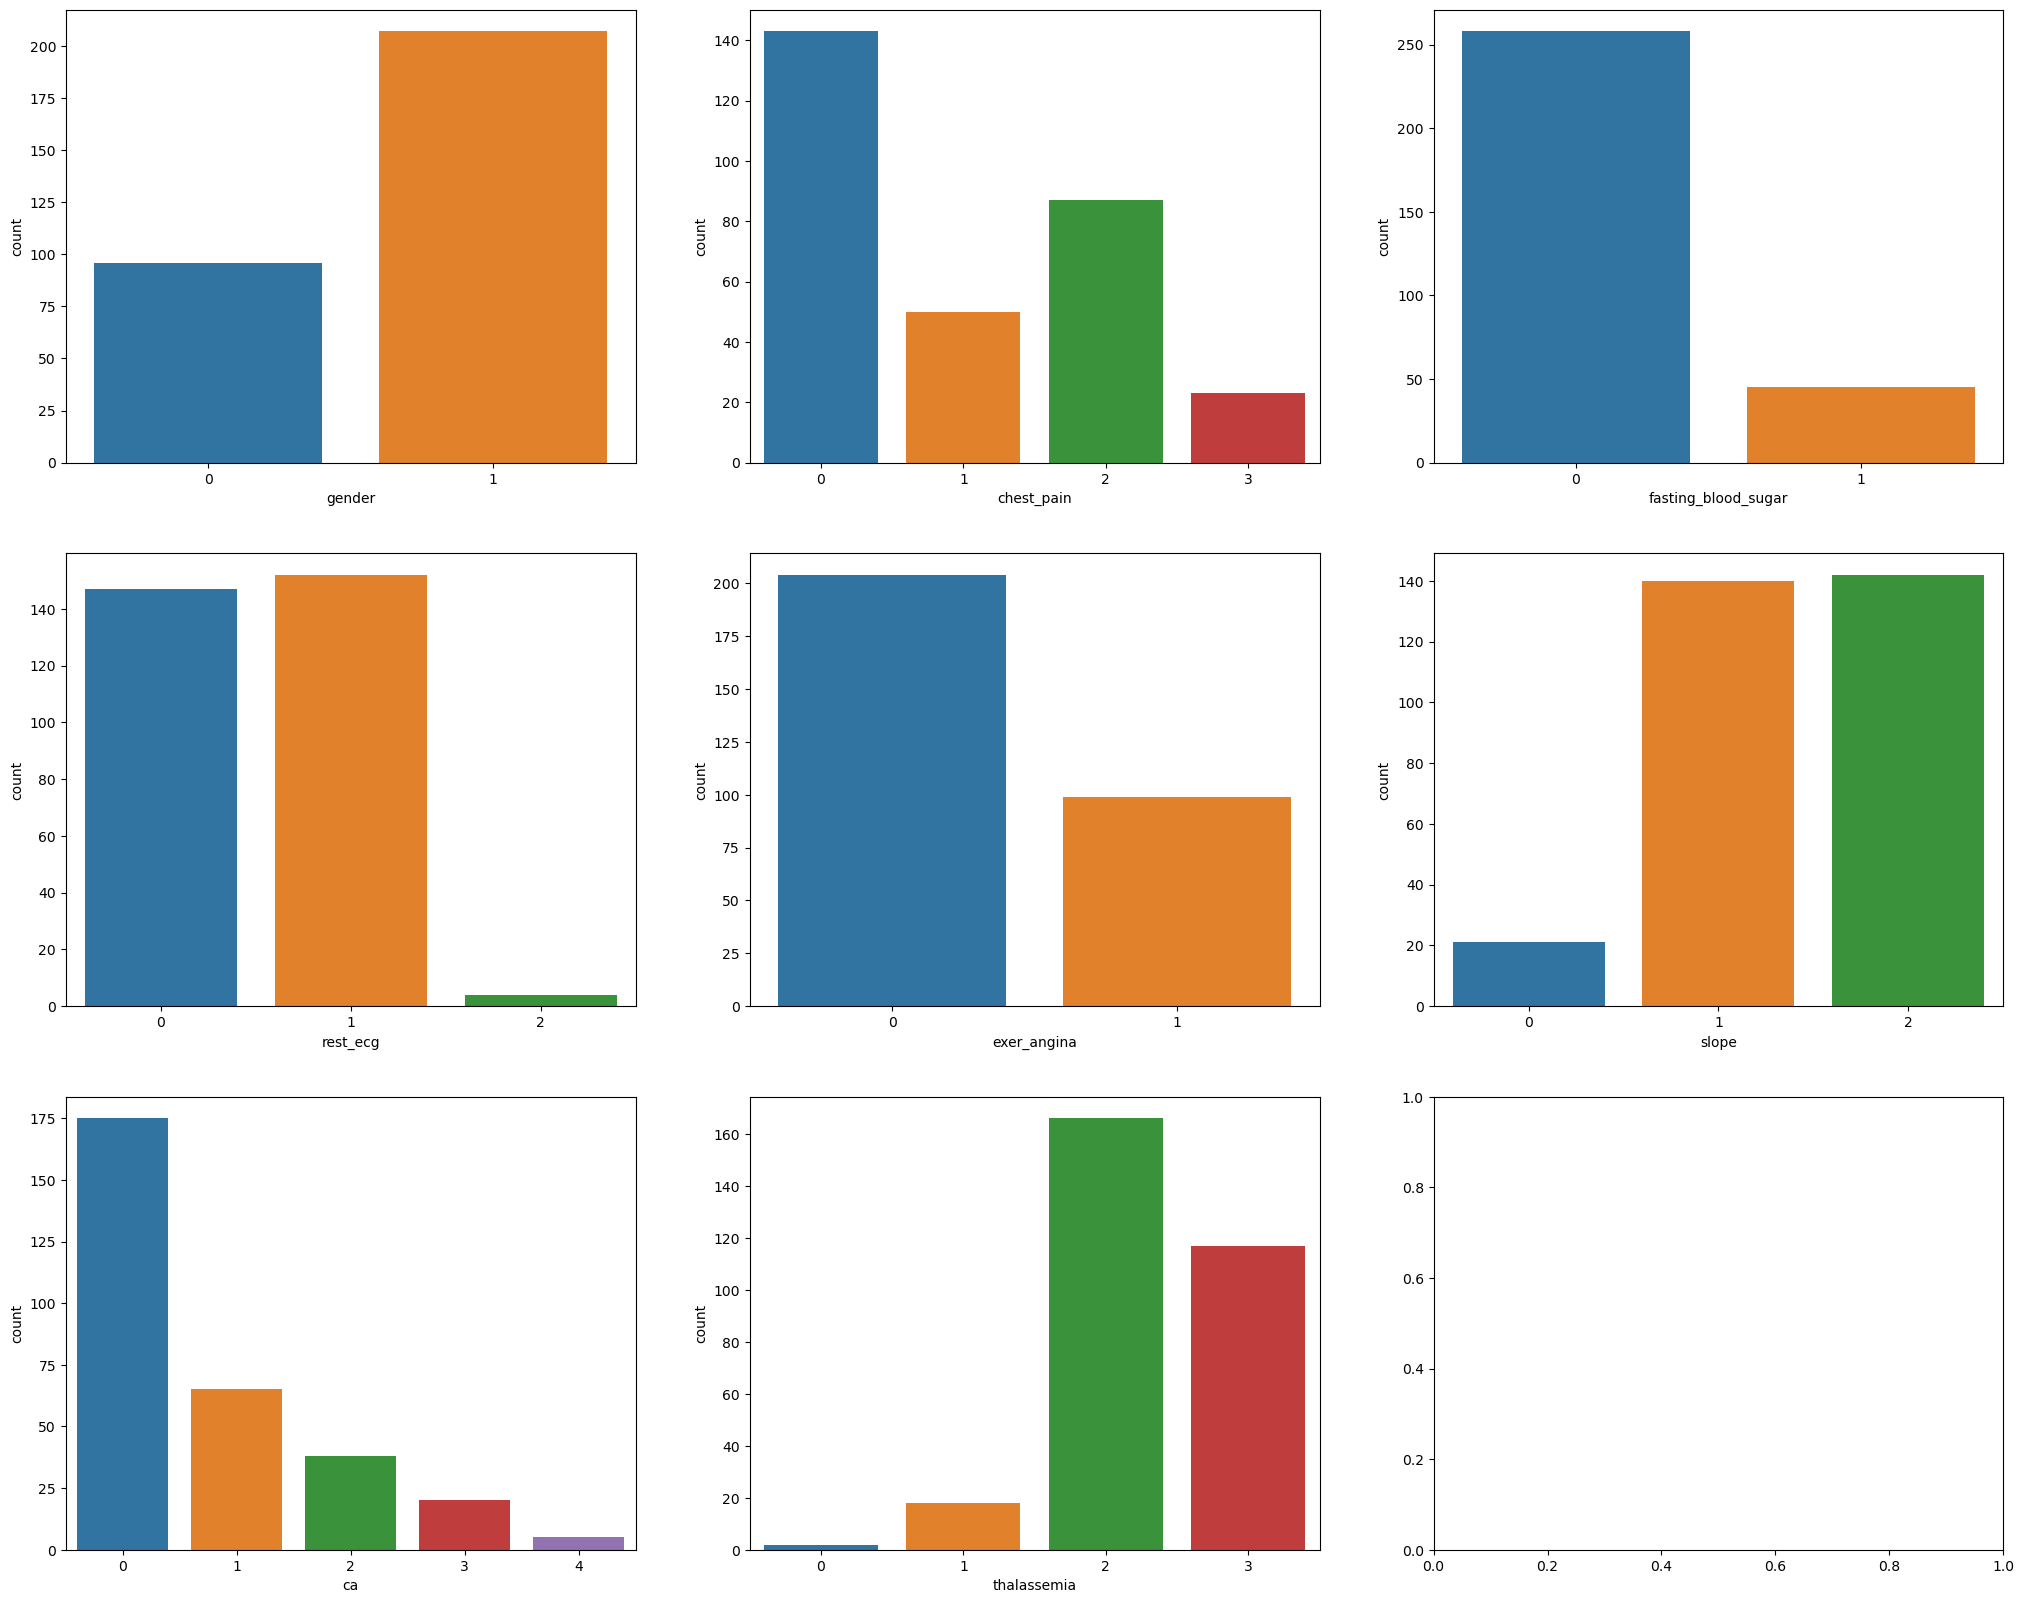

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_features' is your DataFrame containing the features

# initiate an empty list to store the categorical variables
categorical = []

# use for loop to check the data type of each variable
for column in df_features.columns:
    if df_features[column].dtype == 'object':
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the DataFrame and the column for the plot to the parameters, 'data' and 'x'
    sns.countplot(x=df_features[variable], ax=subplot)

# display the plot
plt.show()


In [76]:
class_frequency=df_target.value_counts()
class_frequency

target
1         165
0         138
Name: count, dtype: int64

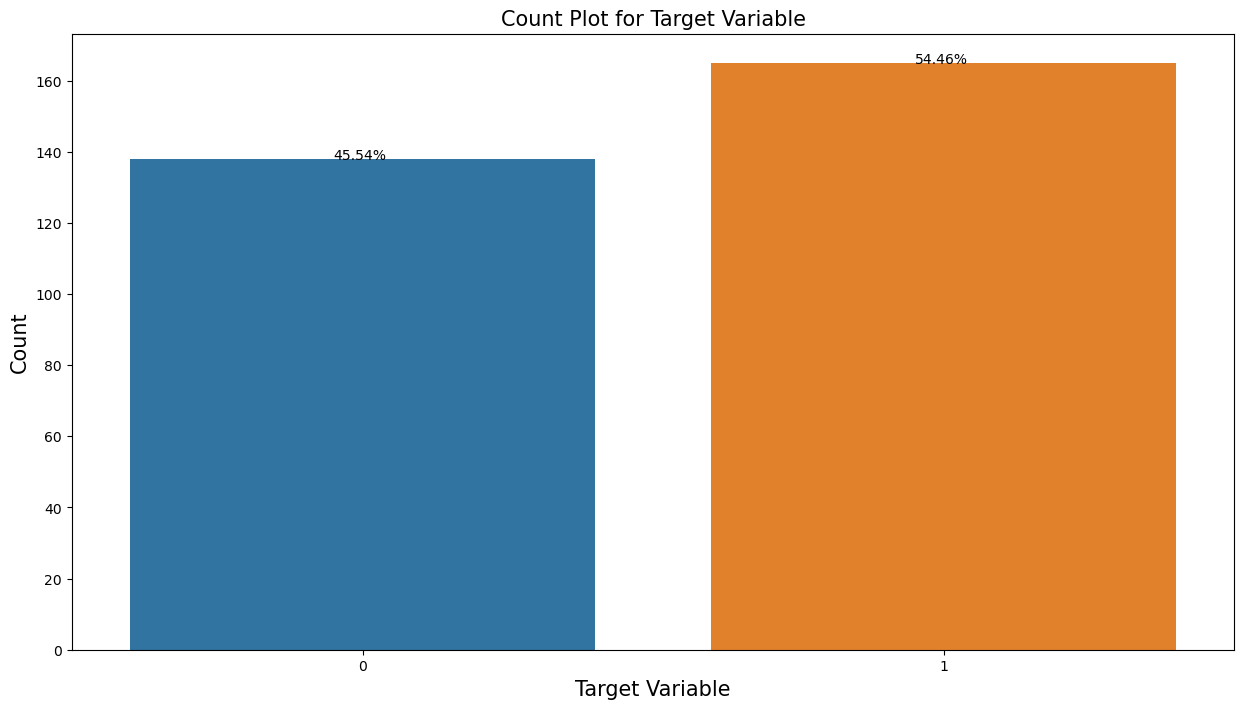

In [77]:
# plot the countplot of the variable 'target'
sns.countplot(x = df_target.target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = df_target.target.value_counts()[0],
         s = str(round((class_frequency[0])*100/len(df_target.target),2)) + '%')
plt.text(x = 0.95, y = df_target.target.value_counts()[1],
         s = str(round((class_frequency[1])*100/len(df_target.target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [87]:
corr = df_features.corr(numeric_only=True)
corr


,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


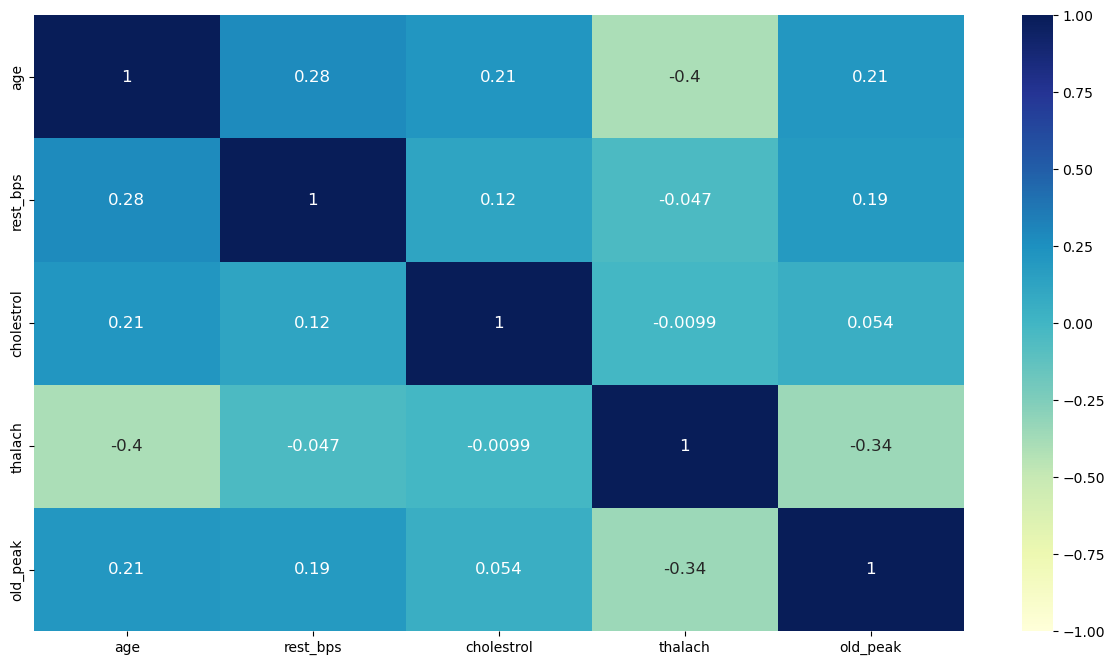

In [88]:
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12})
# mask=mask - Add this parameter to fetch upper/lower triangle of the heatmap   

# display the plot
plt.show()

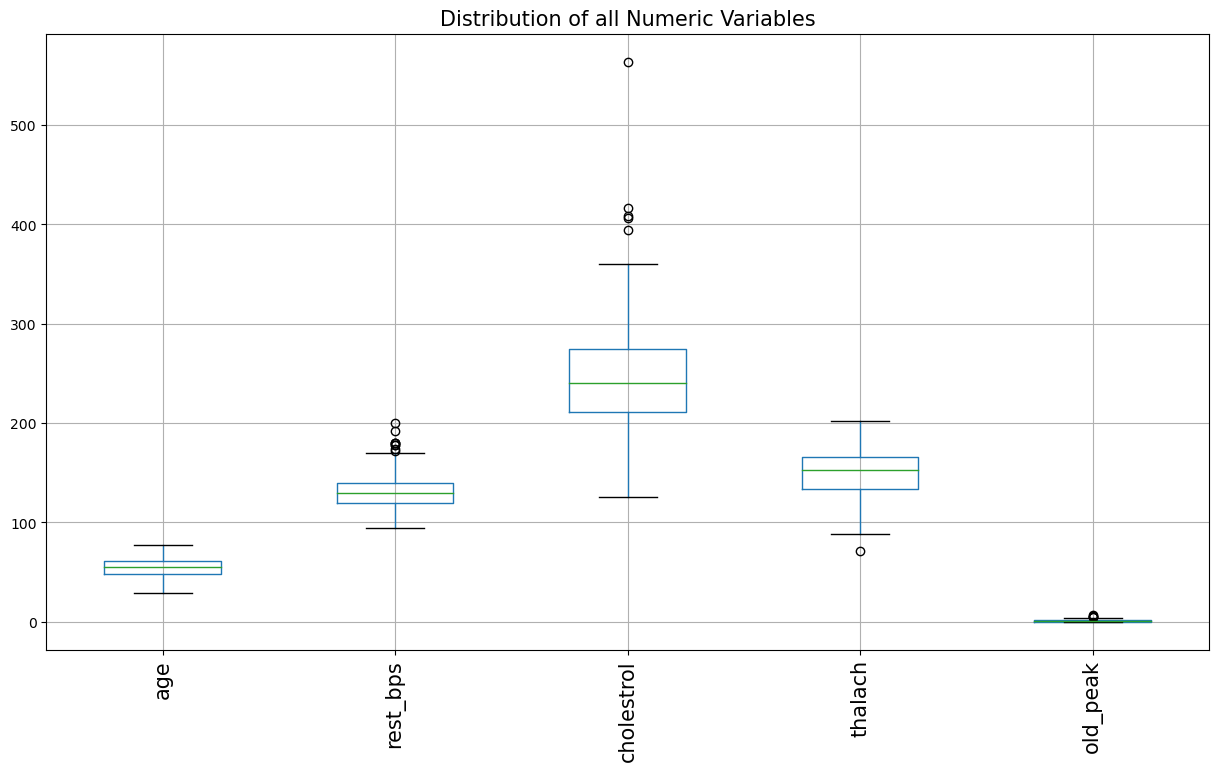

In [89]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

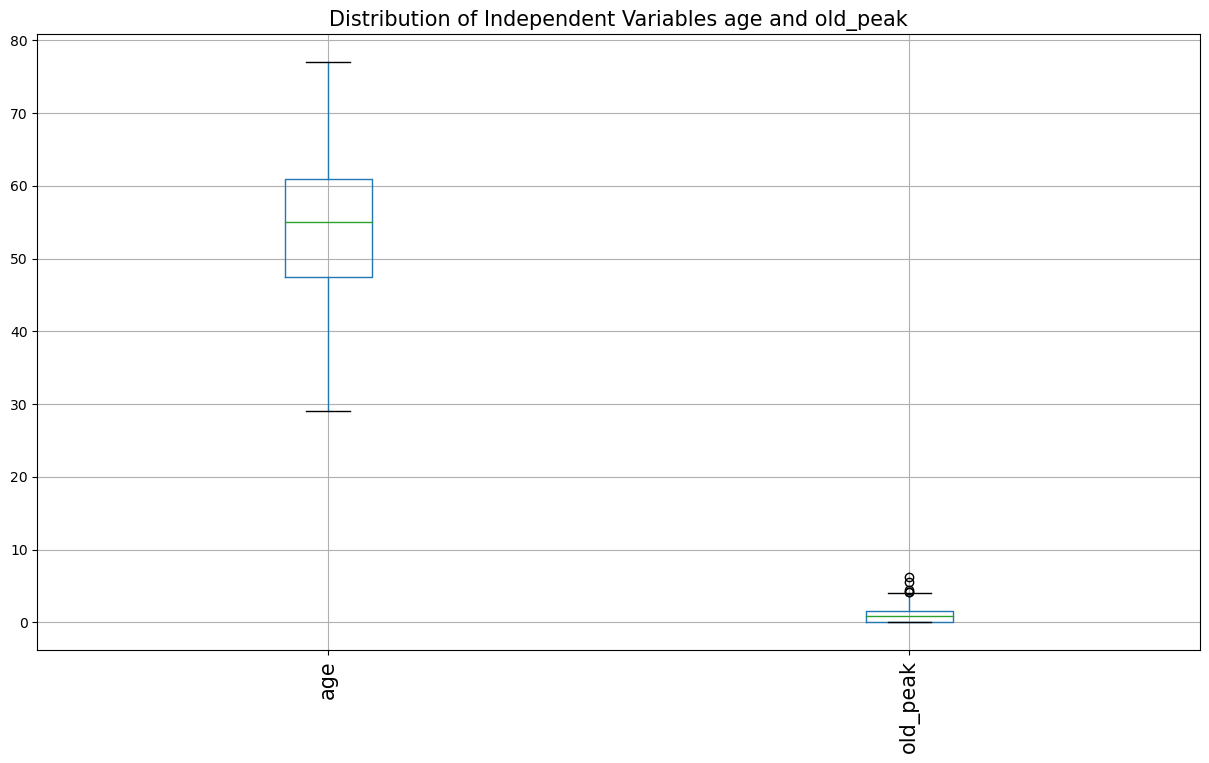

In [90]:
# make a list of numerical features 
cols = [ 'age','old_peak']

# plot multiple boxplots
df_features[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables age and old_peak', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [91]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                    13.5
gender                  1.0
chest_pain              2.0
rest_bps               20.0
cholestrol             63.5
fasting_blood_sugar     0.0
rest_ecg                1.0
thalach                32.5
exer_angina             1.0
old_peak                1.6
slope                   1.0
ca                      1.0
thalassemia             1.0
dtype: object


In [105]:
import pandas as pd

# Assuming df_Heart is your DataFrame

# Calculate Q1, Q3, and IQR for each column
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Define the condition to identify outliers
outlier_condition = ~((df_features < (Q1 - 1.5 * IQR)) | (df_features > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to filter out outliers
df_without_outliers = df_features[outlier_condition]

# Reset the index of the dataframe without outliers
df_without_outliers = df_without_outliers.reset_index(drop=True)


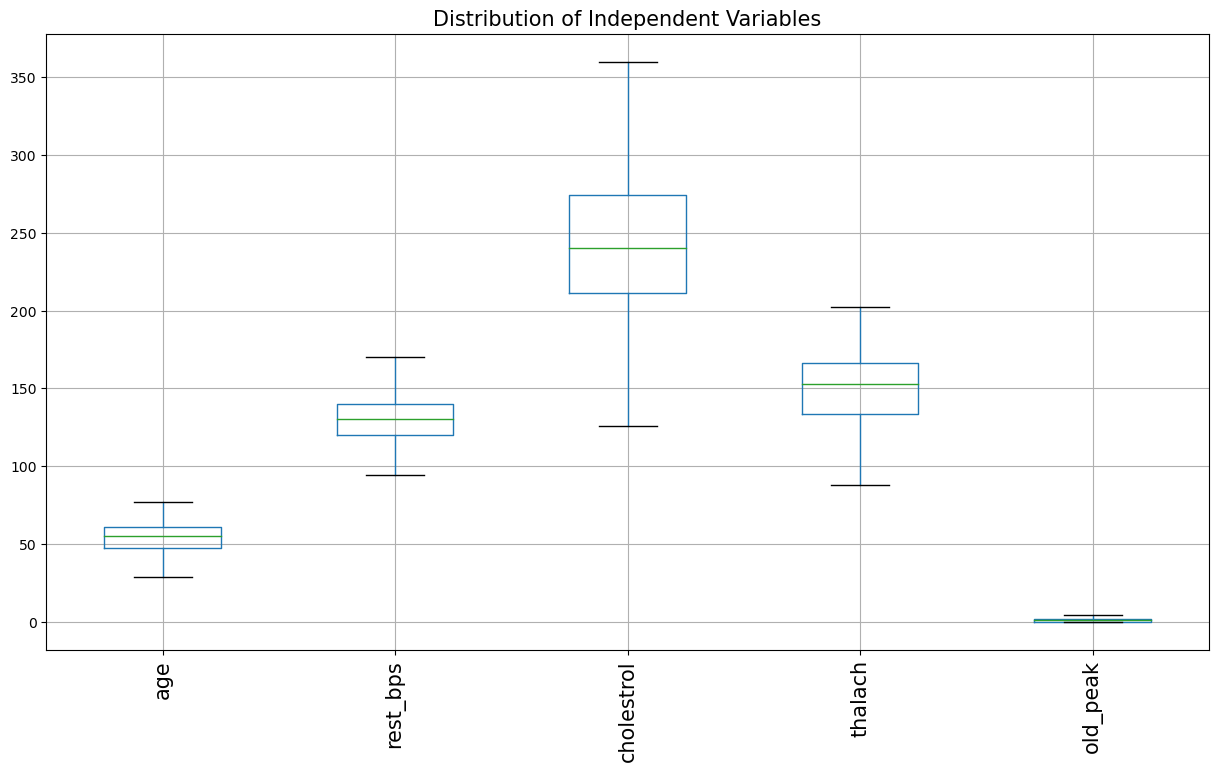

In [108]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of numerical features excluding 'white corpuscle'
cols = ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']

# Plot multiple boxplots without outliers
df[cols].boxplot(showfliers=False)

# Set plot label
plt.title('Distribution of Independent Variables', fontsize=15)

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical', fontsize=15)

# Display the plot
plt.show()


In [110]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


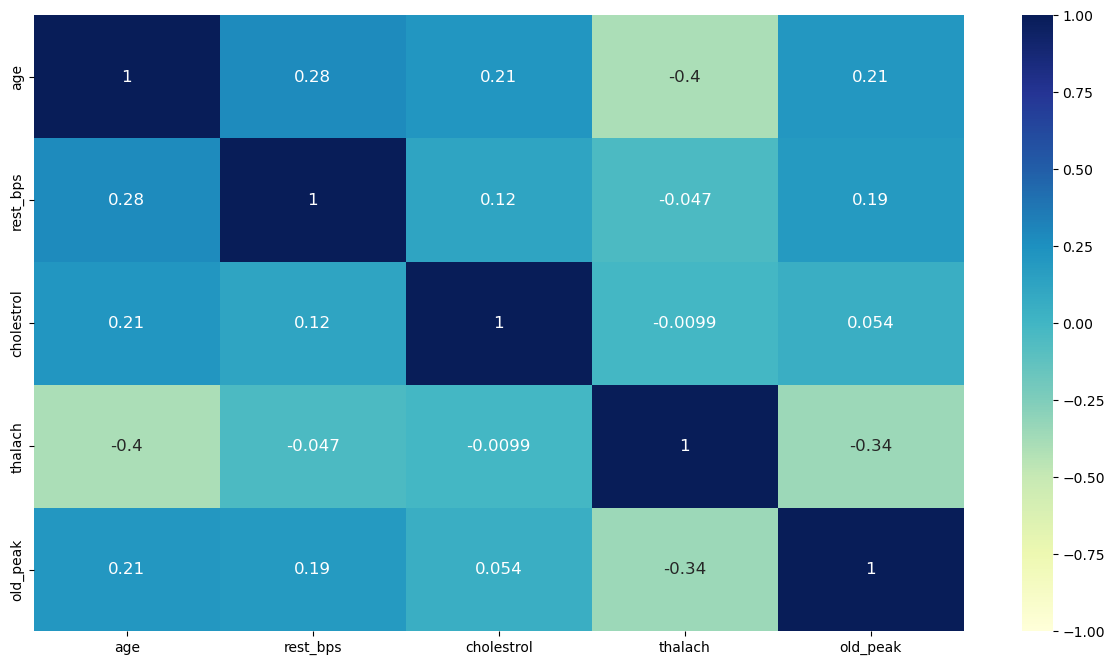

In [111]:
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12})
# mask=mask - Add this parameter to fetch upper/lower triangle of the heatmap   

# display the plot
plt.show()

In [112]:
df_cat=df[categorical]

df_num=df.drop(categorical,axis=1)

In [113]:
df_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [117]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [118]:
df_cat_dummies.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [119]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_dummy = pd.concat([df_num, df_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
df_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [121]:
   # select only the target variable 'target' and store it in dataframe 'y'
y = pd.DataFrame(df_dummy['target'])

In [122]:
# use 'drop()' to remove the variable 'target' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
X = df_dummy.drop('target',axis = 1)

In [124]:
df_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False


In [125]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [126]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined elsewhere in your code

# Define a function to plot a confusion matrix for the model
def plot_confusion_matrix(y_test, y_pred):
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Label the confusion matrix
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'],
                               index=['Actual:0', 'Actual:1'])

    # Plot the confusion matrix using seaborn heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette("skyblue", as_cmap=True),
                cbar=False, linewidths=0.1, annot_kws={'size': 25})

    # Set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize=11)

    # Set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize=20)

    # Display the plot
    plt.show()

# Assuming you have y_test and y_pred defined, you can call the function like this:
# plot_confusion_matrix(y_test, y_pred)


In [132]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')
    
    
    
    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [145]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card._append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [135]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (212, 22)
y_train (212, 1)
X_test (91, 22)
y_test (91, 1)


In [143]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=10)

# Assign the model to the correct variable name using an underscore
decision_tree_model = decision_tree.fit(X_train, y_train)


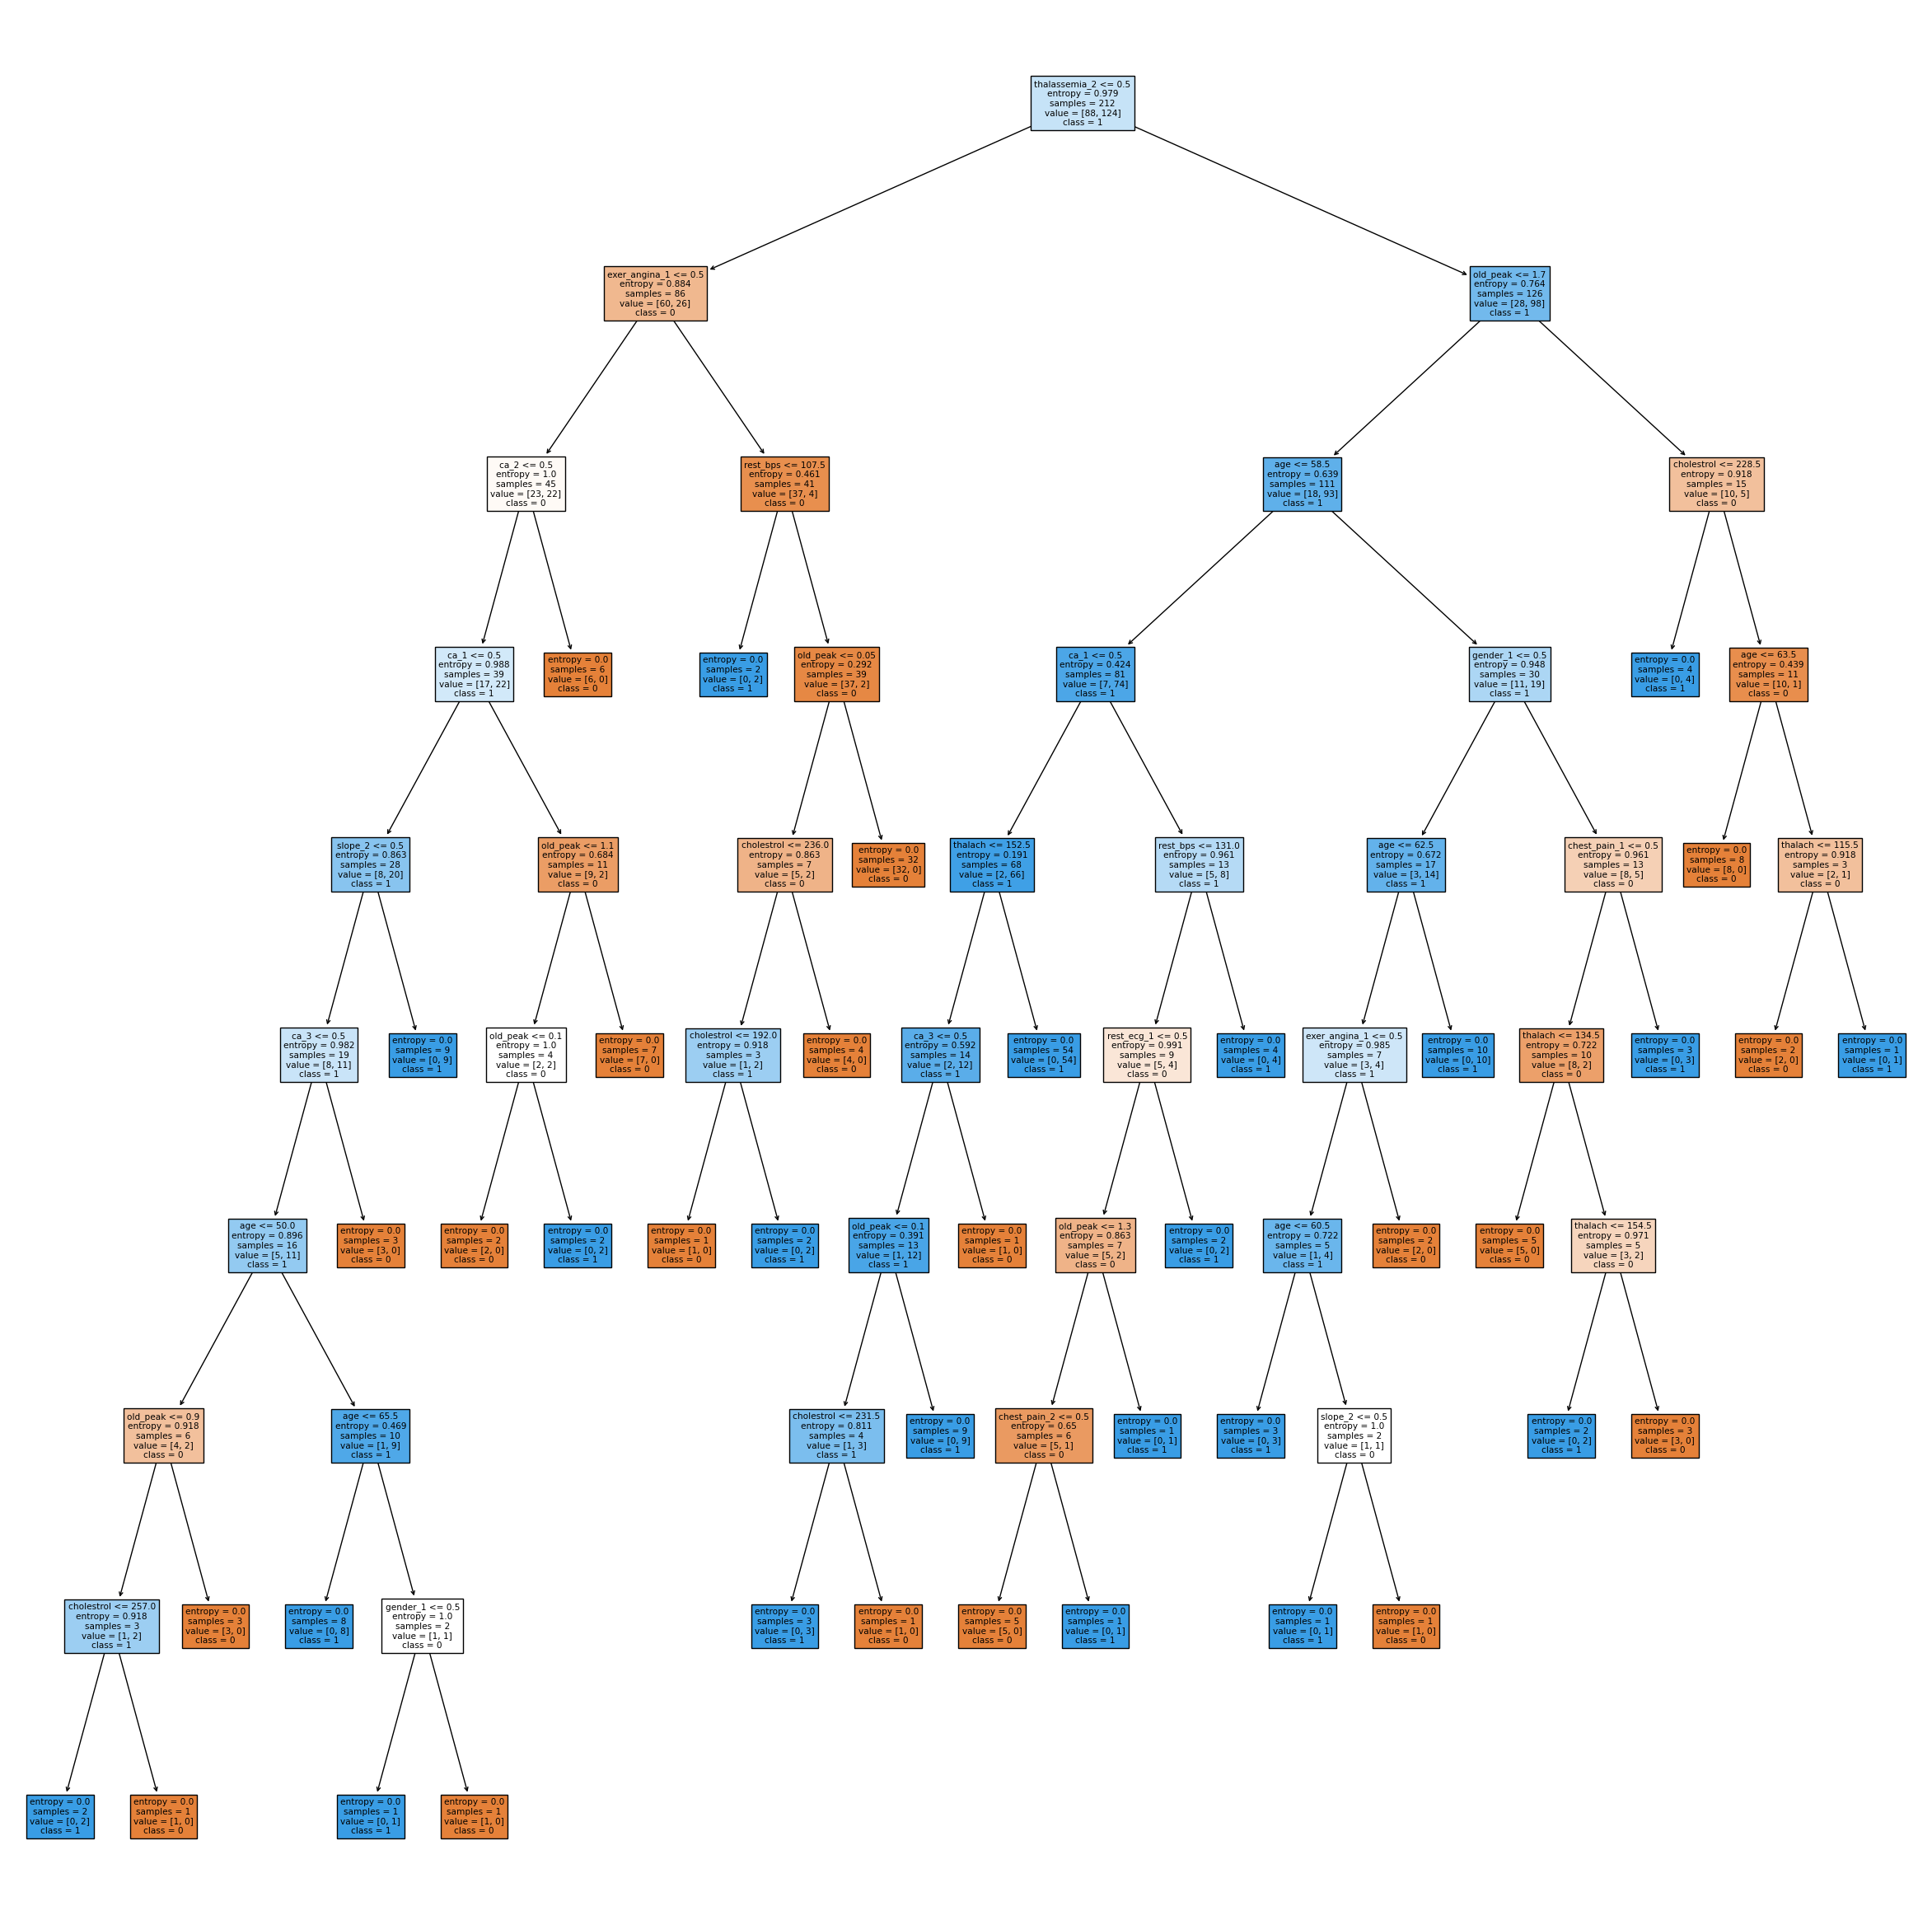

In [148]:
labels = list(X_train.columns)

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model,
                   feature_names=labels,
                   class_names=["0", "1"],
                   filled=True)


In [151]:
# DOT data
dot_data = tree.export_graphviz(decision_tree_model, out_file='DT.dot', 
                                feature_names=labels,  
                                class_names=["0","1"],
                                filled=True)

# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

In [152]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0.])

In [153]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0], dtype=int64)

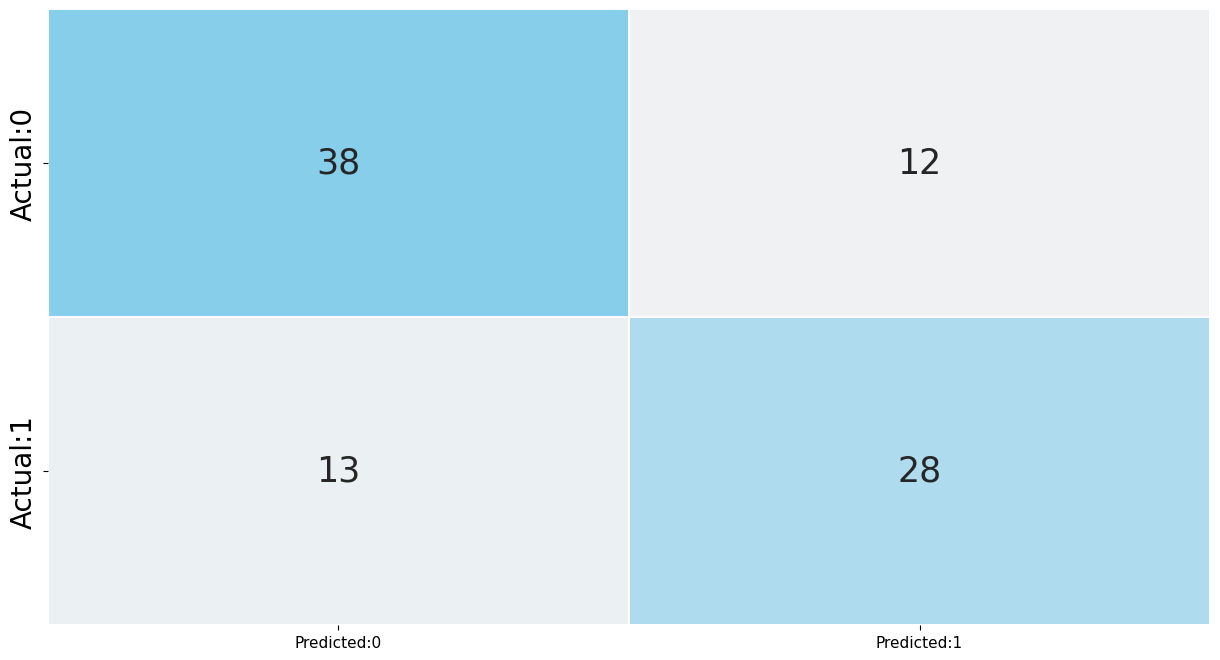

In [155]:
# Assuming you have defined X_test and y_test before
y_pred = decision_tree_model.predict(X_test)

# Call the plot_confusion_matrix function with y_test and y_pred
plot_confusion_matrix(y_test, y_pred)


In [158]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        50
           1       0.70      0.68      0.69        41

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



In [159]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.4439012466389636


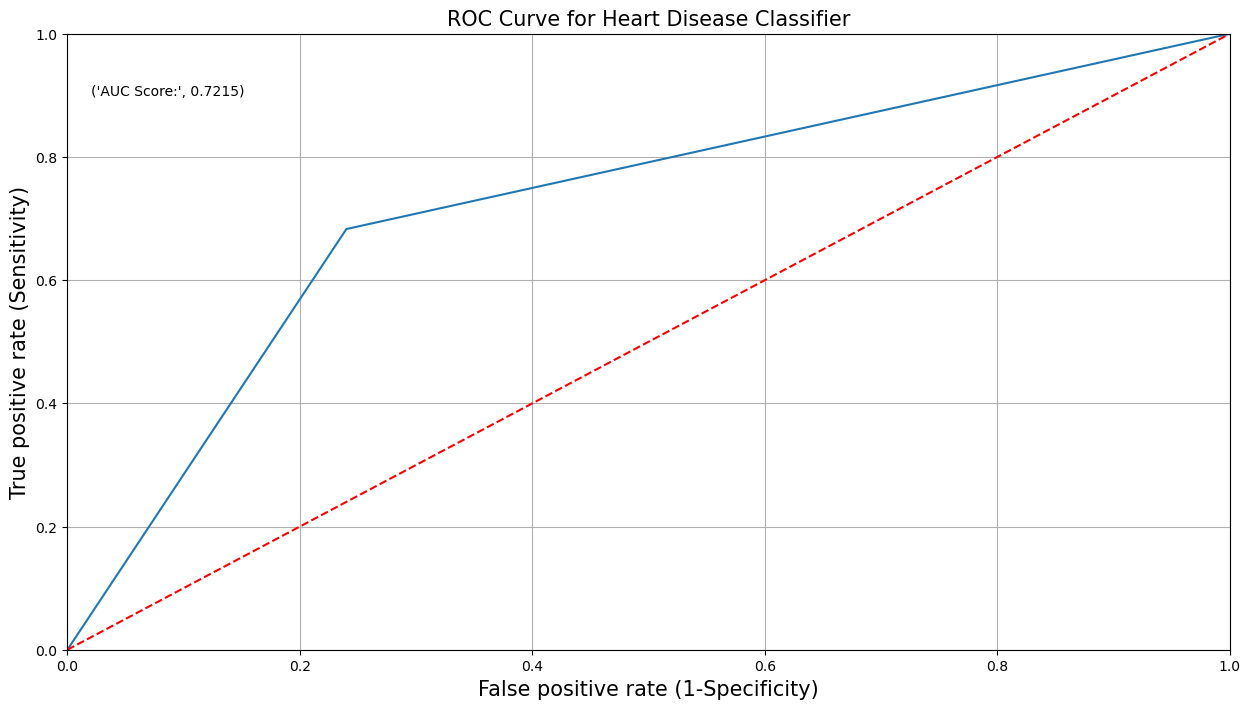

In [160]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree_model)

In [161]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.721463,0.7,0.682927,0.725275,0.443901,0.691358
